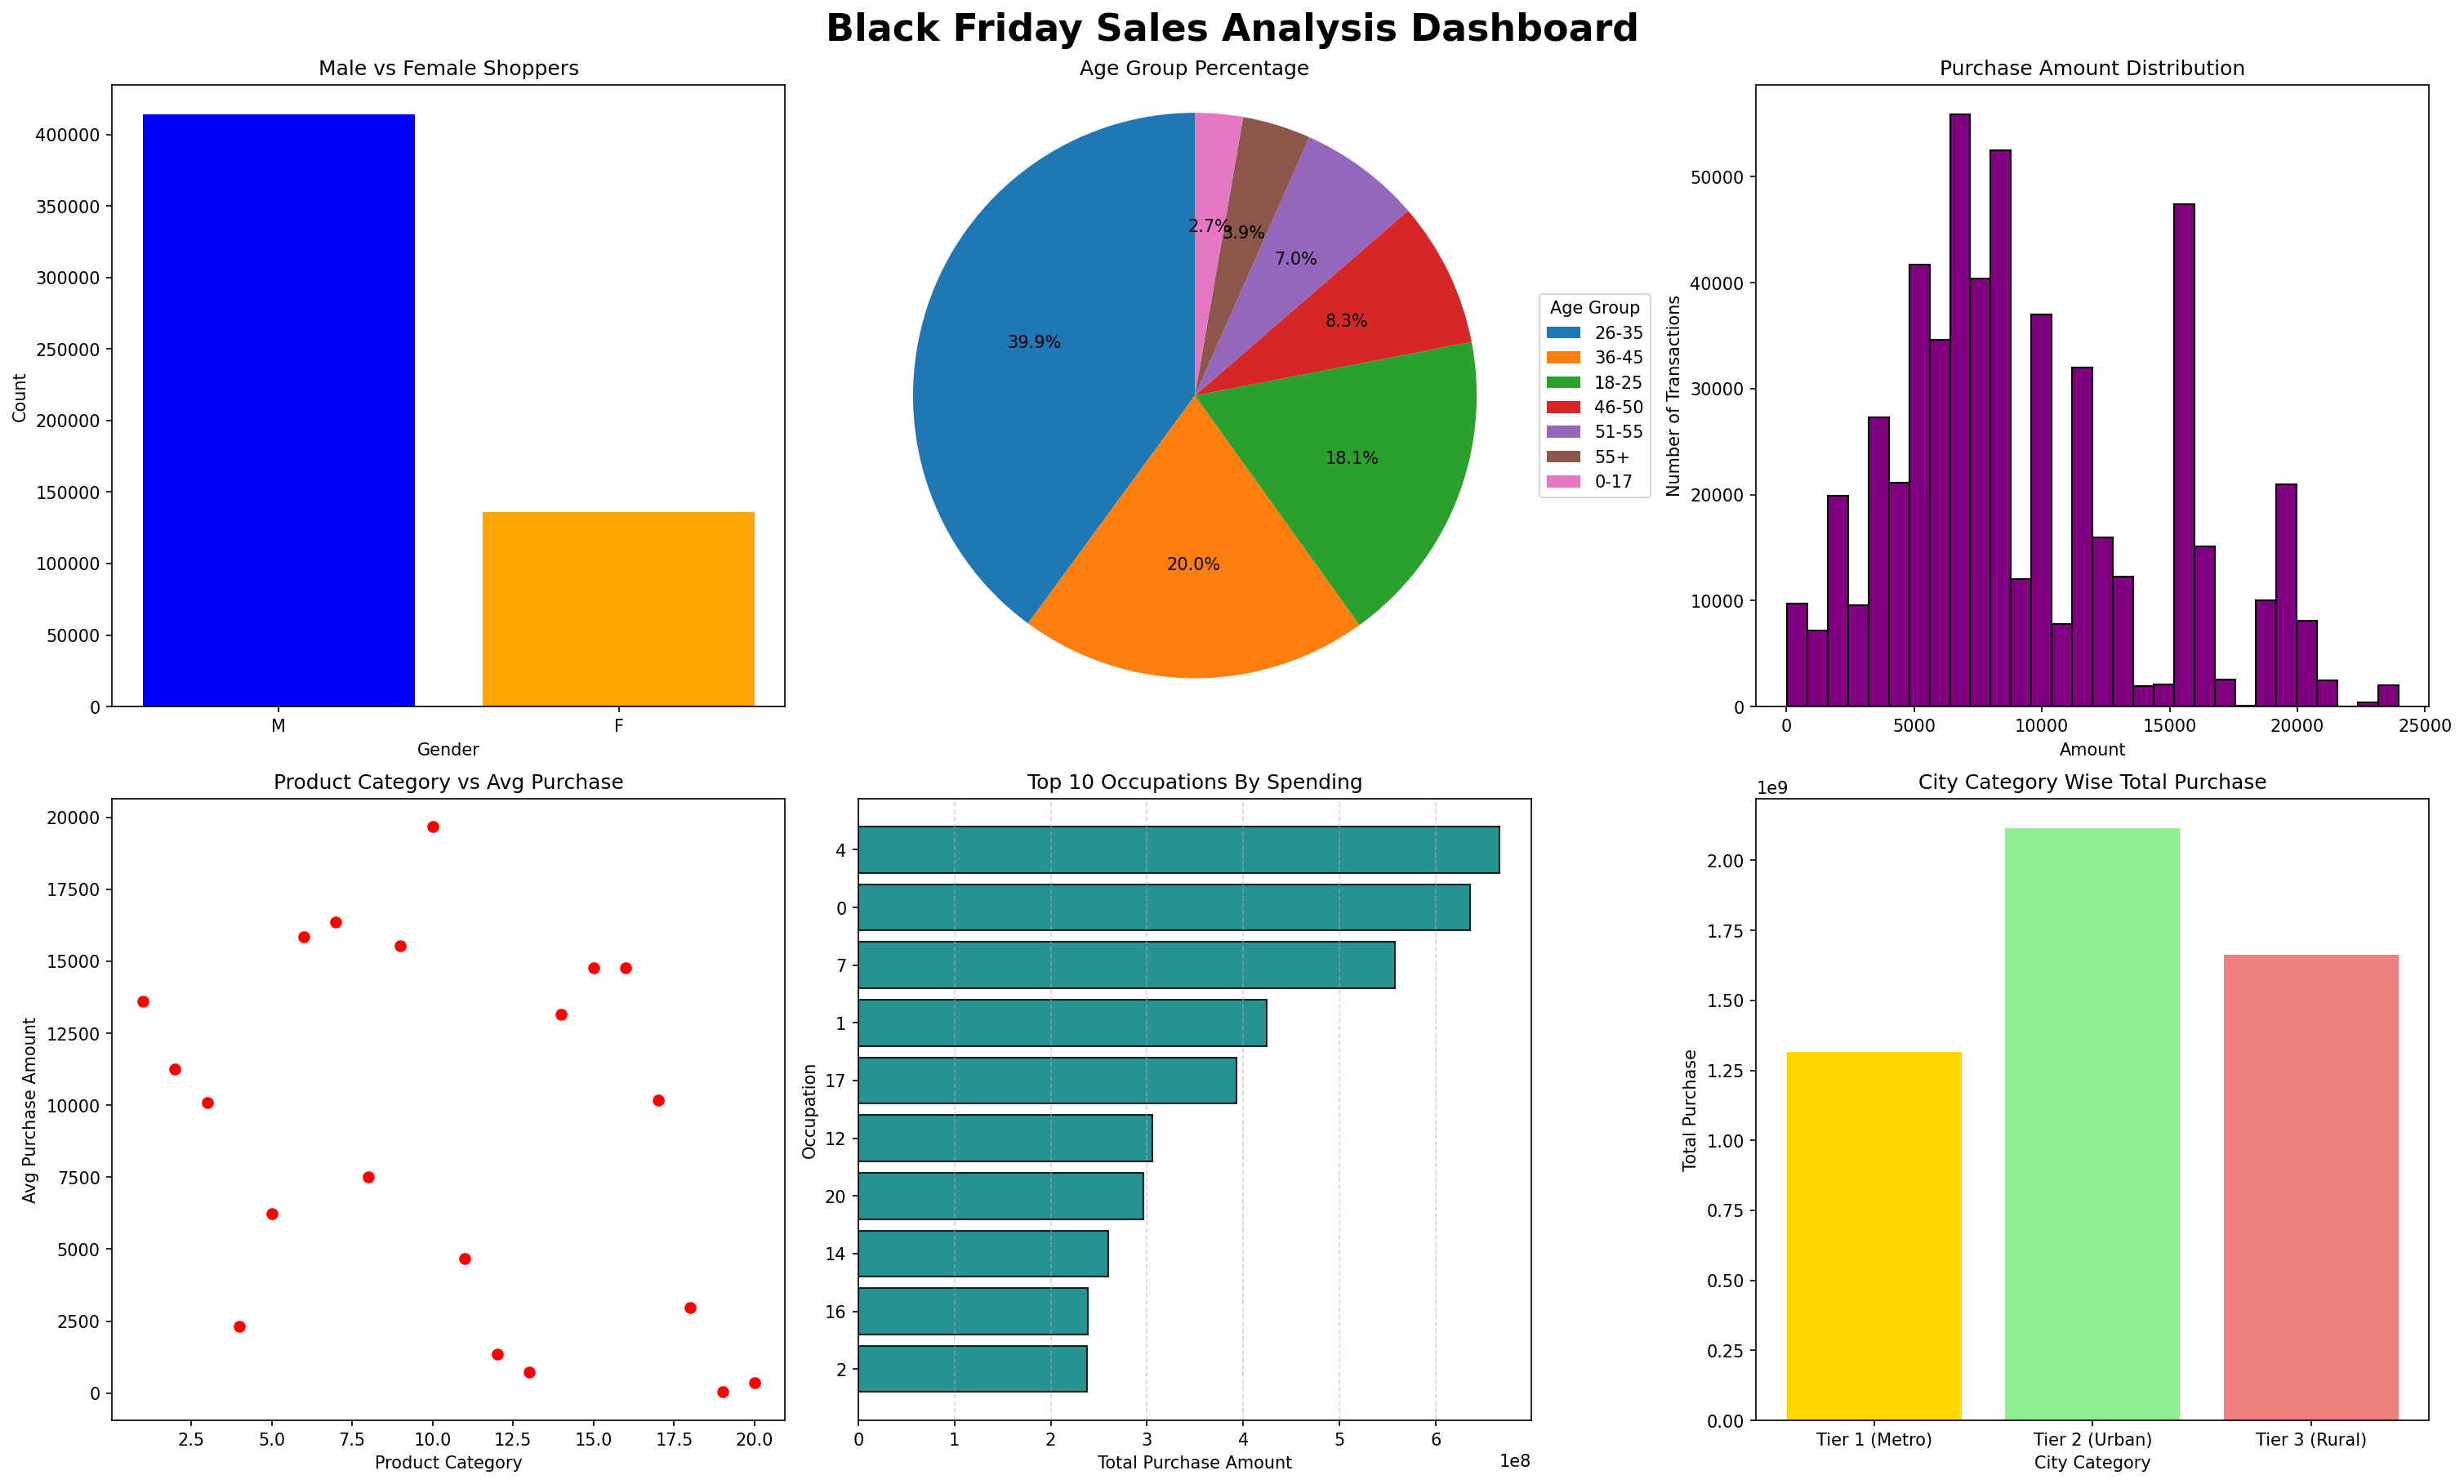

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('../data/BlackFriday.csv')

# Data Cleaning: Fill missing
df.fillna(0, inplace=True)

# Create single dashboard figure (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 12), dpi=150, constrained_layout=True)
fig.suptitle('Black Friday Sales Analysis Dashboard', fontsize=22, fontweight='bold')

# Plot 1: Male vs Female shoppers
gender_counts = df['Gender'].value_counts()
ax1 = axes[0, 0]
ax1.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
ax1.set_title('Male vs Female Shoppers')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Plot 2: Age group percentage
age_counts = df['Age'].value_counts()
ax2 = axes[0, 1]
wedges, texts, autotexts = ax2.pie(
    age_counts.values,
    labels=None,               
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title('Age Group Percentage')
ax2.axis('equal')
ax2.legend(wedges, age_counts.index, title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Plot 3: Purchase Amount Distribution
ax3 = axes[0, 2]
ax3.hist(df['Purchase'], bins=30, color='purple', edgecolor='black')
ax3.set_title('Purchase Amount Distribution')
ax3.set_xlabel('Amount')
ax3.set_ylabel('Number of Transactions')

# Plot 4: Product Category vs Avg Purchase (scatter)
product_purchase = df.groupby('Product_Category_1')['Purchase'].mean()
ax4 = axes[1, 0]
ax4.scatter(product_purchase.index, product_purchase.values, color='red')
ax4.set_title('Product Category vs Avg Purchase')
ax4.set_xlabel('Product Category')
ax4.set_ylabel('Avg Purchase Amount')

# Plot 5: Top Occupation by Amount Spent (barh)
occupation_amount = (
    df.groupby('Occupation')['Purchase']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
ax5 = axes[1, 1]
ax5.barh(occupation_amount.index.astype(str), occupation_amount.values, color='teal', edgecolor='black', alpha=0.85)
ax5.set_title('Top 10 Occupations By Spending')
ax5.set_xlabel('Total Purchase Amount')
ax5.set_ylabel('Occupation')
ax5.invert_yaxis()
ax5.grid(axis='x', linestyle='--', alpha=0.5)

# Plot 6: City Category Wise Total Purchase
city_purchase = df.groupby('City_Category')['Purchase'].sum()
city_labels = {'A': 'Tier 1 (Metro)', 'B': 'Tier 2 (Urban)', 'C': 'Tier 3 (Rural)'}
city_purchase.index = city_purchase.index.map(city_labels)
ax6 = axes[1, 2]
ax6.bar(city_purchase.index, city_purchase.values, color=['gold', 'lightgreen', 'lightcoral'])
ax6.set_title('City Category Wise Total Purchase')
ax6.set_xlabel('City Category')
ax6.set_ylabel('Total Purchase')

# Save one combined image
plt.savefig('../images/dashboard_blackfriday.png', bbox_inches='tight')
plt.show()